In [1]:
#% matplotlib inline

from datetime import datetime 
import h5py
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
import matplotlib.cm as cm
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
cmap = cm.get_cmap('Blues')
import random


target_user = 'Vlasits'

restriction_str = 'experimenter = "{}"'.format(target_user)

In [2]:
field_number = '3' #pick 1, 2, or 3 here, just plotting one field at a time

#read hdf5 file for this notebook
f1 = h5py.File("Data/Fig8.hdf5", "r")

#get the data for plotting the sd image



roimask = np.array(f1['roimask'+field_number])
x_zoom = np.array(f1['x_zoom'+field_number])


f1.close()

In [6]:
#pull data from hdf5 file
dsi_results = pd.read_hdf('Data/Fig8.hdf5', 'dsi_results_'+field_number)

In [7]:
#prep data and do some calculations
dsi_results = dsi_results.rename(columns={0: "pixel_id", 1: "d_prime", 2: "condition1", 3:"condition2"})
dsi_results = dsi_results.set_index('pixel_id')

dsi_results['dsi_100'] = dsi_results['d_prime'].apply(lambda x: x[0])
dsi_results['dsi_150'] = dsi_results['d_prime'].apply(lambda x: x[1])
dsi_results['dsi_200'] = dsi_results['d_prime'].apply(lambda x: x[2])
dsi_results['dsi_300'] = dsi_results['d_prime'].apply(lambda x: x[3])


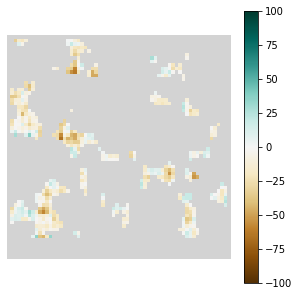

In [8]:
#plot the DS of individual pixels in the FOV

cm = plt.get_cmap('BrBG') #sns.diverging_palette(20, 220, n=50)
cm.set_bad(color='lightgrey')
color_range = 100


roi_list = dsi_results.index.to_frame(index=False)['pixel_id'].unique()
            
#make map for 150 length stimulus            
dsmap2 = roimask*(-1)
xlength = dsmap2.shape[0]
ylength = dsmap2.shape[1]
for x in range(xlength):
    for y in range(ylength):  
        if dsmap2[x,y] in roi_list:
            roi_index = np.int(dsmap2[x, y])
            dsmap2[x,y] = dsi_results.loc[roi_index, 'dsi_150']*-1
        else:
            dsmap2[x,y] = np.nan

            
            
fig = plt.figure(figsize=(5, 5))


ax1 = fig.add_subplot(1,1,1)
plt.imshow(dsmap2, cmap=cm,  origin='lower', vmin=-1*color_range, vmax=color_range,) #'RdYlBu'
cb = plt.colorbar()
plt.axis('off')

plt.show()